# Day 03
## Image Processing

- Goal:
    1. Adjust the saturation, contrast, and brightness of an image.

### (a)

In [1]:
import cv2
import numpy as np

img = cv2.imread('Lenna_(test_image).png', cv2.IMREAD_COLOR)

In [48]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
scale = 0.2

img_satlow = img_hls.astype('float32')                          # type conversion
img_satlow[..., -1] = img_satlow[..., -1]/255 - scale          # ???
img_satlow[img_satlow[..., -1] < 0] = 0                        # adjust values smaller than the lower bound
img_satlow[..., -1] = img_satlow[..., -1]*255
img_satlow = img_satlow.astype('uint8')
img_satlow = cv2.cvtColor(img_satlow, cv2.COLOR_HLS2BGR)

img_sathigh = img_hls.astype('float32')
img_sathigh[..., -1] = img_sathigh[..., -1]/255 + scale
img_sathigh[img_sathigh[..., -1] > 1] = 1                        # adjust values greater than the upper bound
img_sathigh[..., -1] = img_sathigh[..., -1]*255
img_sathigh = img_sathigh.astype('uint8')
img_sathigh = cv2.cvtColor(img_sathigh, cv2.COLOR_HLS2BGR)

img_sat = np.hstack((img_satlow, img, img_sathigh))
cv2.imshow('saturation adjustment', img_sat)

cv2.waitKey(0)
cv2.destroyAllWindows()

### (b)

In [49]:
b, g, r = cv2.split(img)
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)
img_eq = cv2.merge((b_eq, g_eq, r_eq))

img_con = np.hstack((img, img_eq))
cv2.imshow('contrast adjustment', img_con)

cv2.waitKey(0)
cv2.destroyAllWindows()

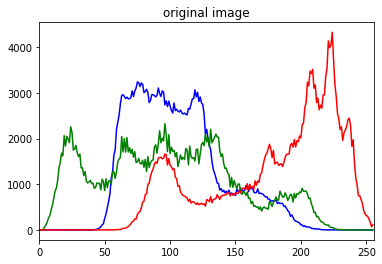

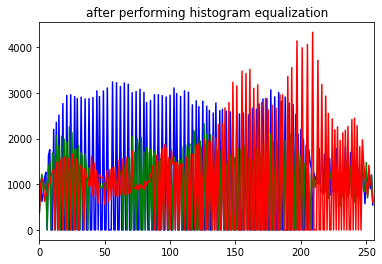

In [43]:
from matplotlib import pyplot as plt

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('original image')
plt.show()

for i, col in enumerate(color):
    histr = cv2.calcHist([img_eq], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('after performing histogram equalization')
plt.show()

### (c)

In [50]:
scale_contrast = cv2.convertScaleAbs(img, alpha = 2.0, beta = 0)
scale_brightness = cv2.convertScaleAbs(img, alpha = 1.0, beta = 50)

img_gainbias = np.hstack((img, scale_contrast, scale_brightness))
cv2.imshow('contrast and brightness adjustment', img_gainbias)

cv2.waitKey(0)
cv2.destroyAllWindows()